In [1]:
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('sim_SMS_Bmeson_3.06185_10e-10.pickle','rb') as f:
    data = pickle.load(f)['Data']

In [3]:
big_bool = np.sum(data['position'] != np.inf, axis = 1) == 3

In [4]:
data['position'][big_bool]

array([[ -9.38932482,  98.32933424,  61.09716987],
       [ 40.45803679,  79.16634202,  77.32556811],
       [-36.87922558, 110.41965265,  60.37552514],
       ...,
       [-13.03768185, 123.3347205 ,  64.63054934],
       [ 41.16984077,  70.04906499,  77.50900707],
       [-47.41458011,  71.22745631,  66.35257987]])

In [5]:
data['momentum']

array([[ 7.36934119, -0.54189236,  5.67494634,  3.52614165],
       [ 5.94016126,  1.74781483,  3.42004006,  3.34051737],
       [ 4.25221465, -0.82978915,  2.48446186,  1.35846007],
       ...,
       [ 8.09549901,  2.74759511,  4.67493837,  5.1728004 ],
       [        nan,         nan,         nan,         nan],
       [ 5.99756572, -2.25828224,  3.39245227,  3.16026953]])

In [6]:
data['momentum'][big_bool]

array([[ 7.36934119, -0.54189236,  5.67494634,  3.52614165],
       [ 5.94016126,  1.74781483,  3.42004006,  3.34051737],
       [ 4.25221465, -0.82978915,  2.48446186,  1.35846007],
       ...,
       [ 4.78882406, -0.34326444,  3.24723553,  1.7016345 ],
       [ 8.09549901,  2.74759511,  4.67493837,  5.1728004 ],
       [ 5.99756572, -2.25828224,  3.39245227,  3.16026953]])

In [7]:
data['daughters'][big_bool]

<Array [[[1.3, 0.375, ..., 5, 1], ...], ...] type='21836 * var * var * float64'>

In [8]:
data.keys()

dict_keys(['position', 'momentum', 'daughters', 'recon', 'wall_hits', 'weight'])

In [9]:
data['weight'][big_bool]

array([1.01077204, 1.01077204, 1.01077204, ..., 1.01077204, 1.01077204,
       1.01077204])

In [10]:
def remove_gunk(data):
    '''Removes all points in data where an infinte position is calculated'''
    #This finds all events with three finite entries
    successful_events = np.sum(data['position'] != np.inf, axis = 1) == 3
    for key in data.keys():
        if type(data[key]) == list:
            data[key] = ak.Array(data[key])[successful_events].to_list()
        else:
            data[key] = data[key][successful_events]
    return data

In [11]:
data = remove_gunk(data)

In [12]:
from multi_plot_generator import heat_maps, multi_curve

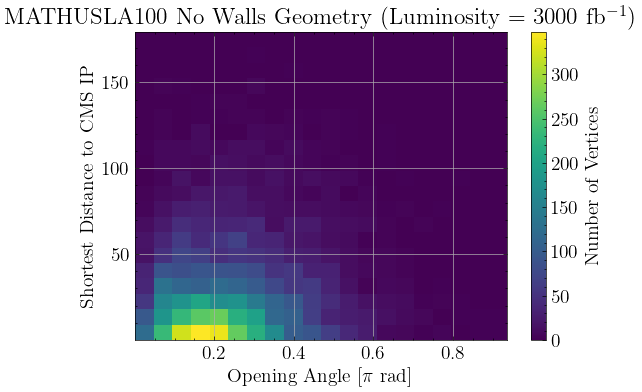

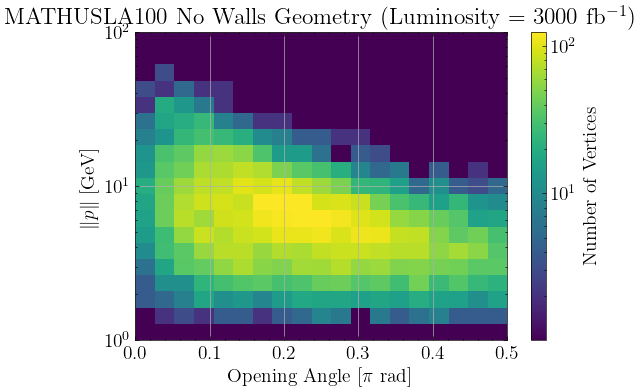

In [13]:
heat_maps(data, ('SMS', 3.06185, 10e-10))

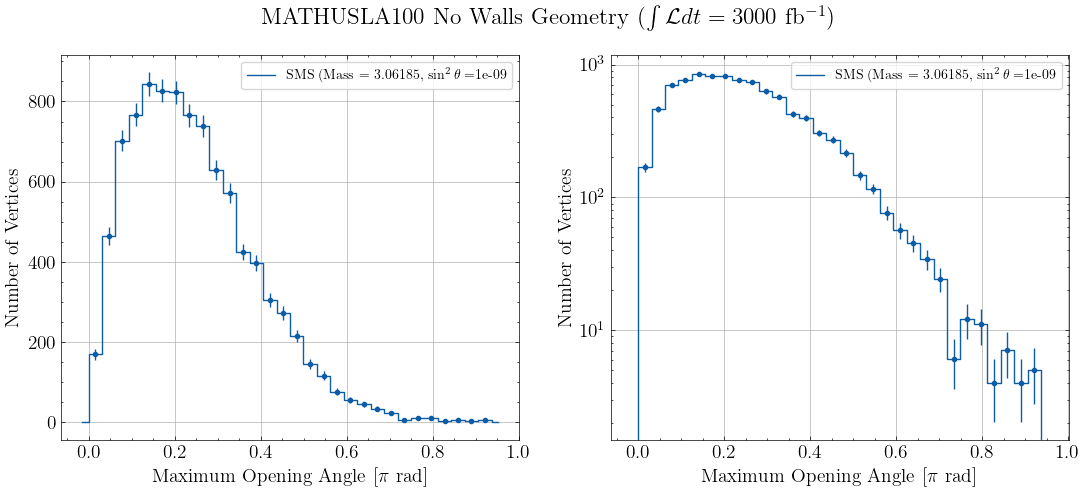

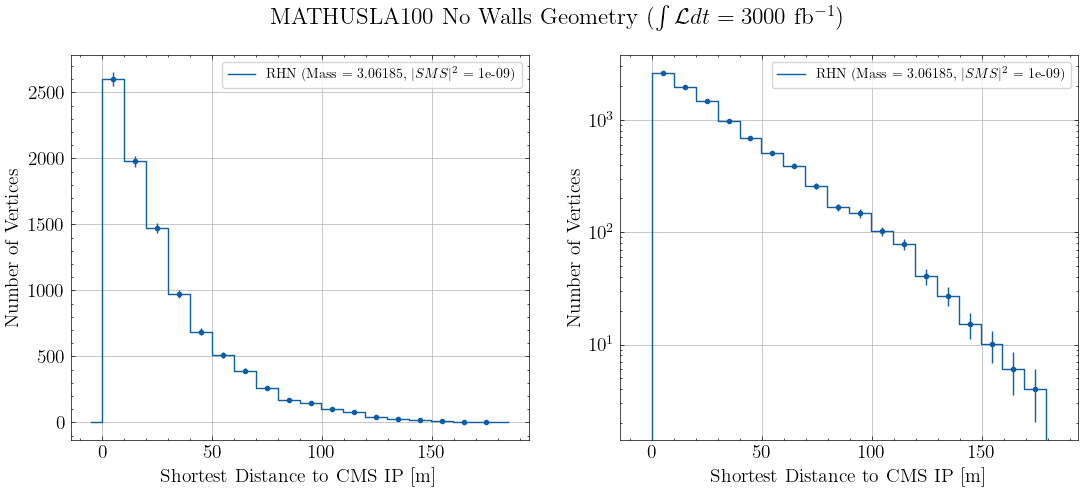

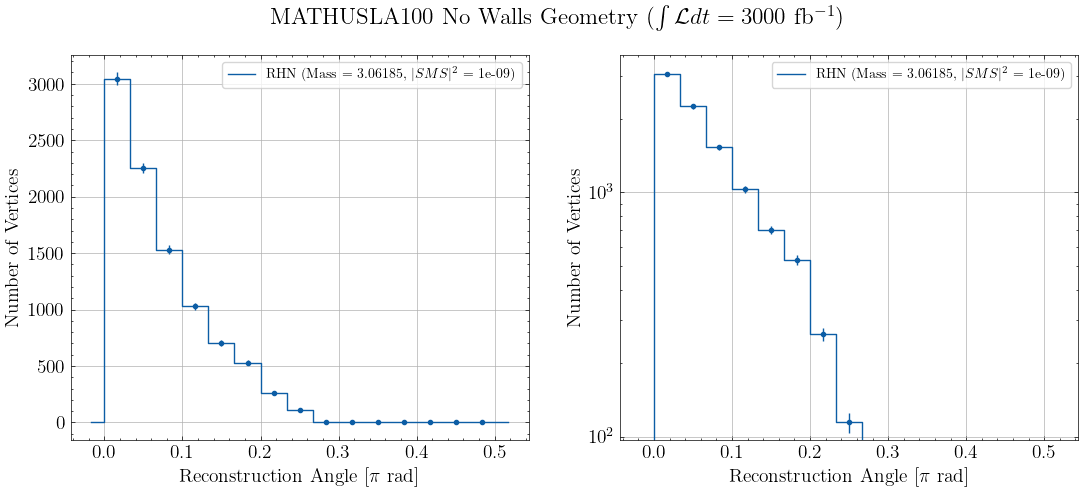

In [14]:
for_multi_curve = {('SMS', 3.06185, 10e-10):data}
multi_curve(for_multi_curve)